In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
# Формування датасету з даних реєстрації транспортних засобів за 3 роки
df_2025 = pd.read_csv('../data/reestrtz30092025.csv', sep=';')
df_2024 = pd.read_csv('../data/tz_opendata_z01012024_po01012025.csv', sep=';')
df_2023 = pd.read_csv('../data/tz_opendata_z01012023_po01012024.csv', sep=';')
df = pd.concat([df_2023, df_2024, df_2025], ignore_index=True)


/var/folders/v2/dx28qdv918n2159dykx079vr0000gn/T/ipykernel_33235/2303986617.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025 = pd.read_csv('../data/reestrtz30092025.csv', sep=';')
/var/folders/v2/dx28qdv918n2159dykx079vr0000gn/T/ipykernel_33235/2303986617.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('../data/tz_opendata_z01012024_po01012025.csv', sep=';')
/var/folders/v2/dx28qdv918n2159dykx079vr0000gn/T/ipykernel_33235/2303986617.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('../data/tz_opendata_z01012023_po01012024.csv', sep=';')


In [3]:
# Огляд даних
df.head()

,PERSON,REG_ADDR_KOATUU,OPER_CODE,OPER_NAME,D_REG,DEP_CODE,DEP,BRAND,MODEL,VIN,MAKE_YEAR,COLOR,KIND,BODY,PURPOSE,FUEL,CAPACITY,OWN_WEIGHT,TOTAL_WEIGHT,N_REG_NEW
0,P,5.910100e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,28.04.23,12293,ТСЦ 8044,FORD,FIESTA,WF0JXXGAJJCA87281,2012,БІЛИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1388.0,1283.0,1530.0,КА3280КЕ
1,P,8.000000e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,07.07.23,12292,ТСЦ 8043,LEXUS,LS 460 L,JTHDL1EF3A5002582,2010,ЧОРНИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,4608.0,1895.0,2350.0,АА0470ІО
2,P,5.212828e+08,313,ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПІ...,03.06.23,12296,ТСЦ 8047,NISSAN,NOTE,SJNFCAE11U2157082,2012,БІЛИЙ,ЛЕГКОВИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,БЕНЗИН,1598.0,1167.0,1580.0,КА7967НК
3,P,8.036600e+09,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,16.05.23,12284,ТСЦ 3245,MITSUBISHI,LANCER,JMBSNCY1ACU001748,2012,СІРИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН АБО ГАЗ,1590.0,1305.0,1750.0,АІ4029КО
4,P,8.038900e+09,254,НАЛЕЖНИЙ КОРИСТУВАЧ. РЕЄСТРАЦІЯ,05.09.23,10000,OLD_ДДАІ МВС УКРАЇНИ,TOYOTA,CAMRY,JTNBF4FK003012666,2012,СІРИЙ,ЛЕГКОВИЙ,СЕДАН,ЗАГАЛЬНИЙ,БЕНЗИН,2494.0,1430.0,2100.0,АА2799ХЕ


In [4]:
#  Виправлення типу даних в 17 та 18 колонках
df['OWN_WEIGHT'] = pd.to_numeric(df['OWN_WEIGHT'], errors='coerce')
df['TOTAL_WEIGHT'] = pd.to_numeric(df['TOTAL_WEIGHT'], errors='coerce')

In [5]:
# Розмір датасету
df.shape

(6110746, 20)

In [6]:
# Загальна інформація про дані
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110746 entries, 0 to 6110745
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PERSON           object 
 1   REG_ADDR_KOATUU  float64
 2   OPER_CODE        int64  
 3   OPER_NAME        object 
 4   D_REG            object 
 5   DEP_CODE         int64  
 6   DEP              object 
 7   BRAND            object 
 8   MODEL            object 
 9   VIN              object 
 10  MAKE_YEAR        int64  
 11  COLOR            object 
 12  KIND             object 
 13  BODY             object 
 14  PURPOSE          object 
 15  FUEL             object 
 16  CAPACITY         float64
 17  OWN_WEIGHT       float64
 18  TOTAL_WEIGHT     float64
 19  N_REG_NEW        object 
dtypes: float64(4), int64(3), object(13)
memory usage: 932.4+ MB


Так як до датасету не надається пояснення, складемо опис колонок виходячи з попереднього огляду даних:

- PERSON - Тип особи (P - фізична, J - юридична)
- REG_ADDR_KOATUU - Код регіону по довіднику КОАТУУ
- OPER_CODE - Код операції
- OPER_NAME - Назва операції
- D_REG - Дата реєстрації
- DEP_CODE - Код департаменту
- DEP - Назва департаменту
- BRAND - Марка транспортного засобу
- MODEL - Модель транспортного засобу
- VIN - Унікальний 17-значний ідентифікаційний номер автомобіля
- MAKE_YEAR - Рік випуску
- COLOR - Колір
- KIND - Тип транспортного засобу
- BODY - Тип кузова
- PURPOSE - Призначення
- FUEL - Тип палива
- CAPACITY - Обсяг двигуна
- OWN_WEIGHT - Власна вага транспортного засобу
- TOTAL_WEIGHT - Повна (максимально допустима) вага
- N_REG_NEW - Номер транспортного засобу

In [7]:
# Конвертування значення колонки D_REG в дату
df['D_REG'] = pd.to_datetime(df['D_REG'], format='%d.%m.%y')

In [8]:
# Кількість унікальних значень для кожної з категоріальних колонок
categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
    unique_count = df[column].nunique()
    print(f'{column}: {unique_count} унікальних значень')

PERSON: 2 унікальних значень
OPER_NAME: 130 унікальних значень
DEP: 182 унікальних значень
BRAND: 2861 унікальних значень
MODEL: 31820 унікальних значень
VIN: 3896069 унікальних значень
COLOR: 12 унікальних значень
KIND: 11 унікальних значень
BODY: 270 унікальних значень
PURPOSE: 3 унікальних значень
FUEL: 13 унікальних значень
N_REG_NEW: 4446605 унікальних значень


Обсяг даних великий, тож спробуємо оптимізувати пам'ять перетворивши категоріальні колонки на категоріальний тип. Не враховуємо VIN та N_REG_NEW, які не є категоріями

Перевіримо результат до і після оптимізації

In [9]:
# Обсяг пам'яті до перетворення
print("До перетворення:")
df.info(memory_usage='deep')

# Список колонок для перетворення
cols_to_category = [
    'PERSON', 'OPER_NAME', 'DEP', 'BRAND', 'MODEL',
    'COLOR', 'KIND', 'BODY', 'PURPOSE', 'FUEL' 
]

# Перетворюємо зазначені колонки на категоріальні
df[cols_to_category] = df[cols_to_category].astype('category')

# Перевіряємо обсяг пам'яті після перетворення
print("\nПісля перетворення:")
df.info(memory_usage='deep')


До перетворення:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110746 entries, 0 to 6110745
Data columns (total 20 columns):
 #   Column           Dtype         
---  ------           -----         
 0   PERSON           object        
 1   REG_ADDR_KOATUU  float64       
 2   OPER_CODE        int64         
 3   OPER_NAME        object        
 4   D_REG            datetime64[ns]
 5   DEP_CODE         int64         
 6   DEP              object        
 7   BRAND            object        
 8   MODEL            object        
 9   VIN              object        
 10  MAKE_YEAR        int64         
 11  COLOR            object        
 12  KIND             object        
 13  BODY             object        
 14  PURPOSE          object        
 15  FUEL             object        
 16  CAPACITY         float64       
 17  OWN_WEIGHT       float64       
 18  TOTAL_WEIGHT     float64       
 19  N_REG_NEW        object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(

In [10]:
# Проаналізуємо типи транспортних засобів наявні в датасеті
print(df['KIND'].value_counts())

KIND
ЛЕГКОВИЙ          5018083
ВАНТАЖНИЙ          538789
МОТОЦИКЛ           217784
НАПІВПРИЧІП        131514
ПРИЧІП             116027
АВТОБУС             74137
МОПЕД               11691
КВАДРОЦИКЛ           2079
ТРИЦИКЛ               627
СПЕЦІАЛІЗОВАНІ         14
НЕВИЗНАЧЕНИЙ            1
Name: count, dtype: int64


Більшість транспортних засобів - це легкові авто

In [11]:
# Проаналізуємо типи осіб наявні в датасеті
print(df['PERSON'].value_counts())

PERSON
P    5623142
J     487604
Name: count, dtype: int64


Фізичні особи здійснюють більше ніж в 10 разів більше операцій з транспортними засобами

In [12]:
# Проаналізуємо наявні в датасеті типи палива
print(df['FUEL'].value_counts())

FUEL
БЕНЗИН                         2408347
ДИЗЕЛЬНЕ ПАЛИВО                2035534
БЕНЗИН АБО ГАЗ                  967925
ЕЛЕКТРО                         278974
ЕЛЕКТРО АБО БЕНЗИН              124670
ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО      21773
ГАЗ                              18913
БЕНЗИН, ГАЗ АБО ЕЛЕКТРО           4679
ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ            263
НЕ ВИЗНАЧЕНО                       262
ВІДСУТНЄ                            67
.                                   61
ГАЗ ТА ЕЛЕКТРО                      38
Name: count, dtype: int64


В типах палива є значення "НЕ ВИЗНАЧЕНО", "ВІДСУТНЄ", та "." - їх буде потрібно об'єднати в одну категорію

In [13]:
# Для аналізу оберемо легкові автомобілі,з якими здійснювали операції фізичні особи. Створимо окремий датафрейм
df_car = df[(df['KIND'] == 'ЛЕГКОВИЙ') & (df['PERSON'] == 'P')].copy()

In [14]:
# Обсяг датасету після обмеження
df_car.shape

(4770487, 20)

In [15]:
# Аналіз пропущених значень
df_car.isnull().sum()

PERSON                  0
REG_ADDR_KOATUU         8
OPER_CODE               0
OPER_NAME               0
D_REG                   0
DEP_CODE                0
DEP                     0
BRAND                   0
MODEL                   0
VIN                    65
MAKE_YEAR               0
COLOR                   0
KIND                    0
BODY                    0
PURPOSE                 0
FUEL                 1097
CAPACITY           266099
OWN_WEIGHT           1180
TOTAL_WEIGHT          937
N_REG_NEW           44910
dtype: int64

Маємо дуже багато пропущених значень щодо об'єму двигуна, тому не будемо використовувати цю колонку в аналізі. Щодо виду палива пропущених значень не багато, тому додамо їх до категорії "НЕ ВИЗНАЧЕНО".

VIN та N_REG_NEW (номер) не несуть статистичної цінності, тому залишимо ці колонки без уваги.
Так як аналіз присвячений тенденціям покупки авто, то вагу авто також не будемо аналізувати.

In [16]:
# Переглянемо присутні в датасеті операції. Для зручності аналізу вивантажимо в ексель
with pd.option_context('display.max_rows', 10):
    result = df_car.groupby(['OPER_CODE', 'OPER_NAME'], observed=True).size().reset_index(name='count')
    result = result.sort_values('count', ascending=False)
    display(result)
    result.to_excel('oper_codes.xlsx', index=False)

,OPER_CODE,OPER_NAME,count
49,315,ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГОВОРУ У...,1407285
43,308,ПЕРЕРЕЄСТРАЦІЯ НА НОВОГО ВЛАСНИКА ЗА ДОГ. КУПI...,921579
30,254,НАЛЕЖНИЙ КОРИСТУВАЧ. РЕЄСТРАЦІЯ,607688
48,314,ПЕРЕРЕЄСТРАЦІЯ ТЗ ІЗ УКЛАДАННЯМ ДОГОВОРУ КУПІВ...,343134
15,100,ПЕРВИННА РЕЄСТРАЦIЯ Б/В ТЗ ПРИДБАНОГО В ТОРГІВ...,301307
...,...,...,...
18,120,РЕЄСТРАЦIЯ ТЗ ОТРИМАНОГО ПО ВИГРАШУ,1
5,50,ВТОРИННА РЕЄСТРАЦIЯ ТЗ ЗА ДОГОВОРОМ КУПIВЛI-ПР...,1
85,437,ПЕРЕРЕЄСТРАЦІЯ У ЗВ’ЯЗКУ З ДЕМОНТАЖЕМ СССП АВТ...,1
3,40,"ВТОРИННА РЕЄСТРАЦІЯ ТЗ, ПРИДБАНОГО В ТОРГОВЕЛЬ...",1


Маємо великий перелік операцій. Для подальшого аналізу оберемо лише ті, які відповідають за змістом операціям придбання авто і створимо нову колонку з типом операції.

Проте спочатку перевіримо дані на аномалії і помилки, і видалимо їх

In [17]:
# Перевіримо, що дата випуску авто завжди більша за дату реєстрації
is_future_year = df_car['MAKE_YEAR'] > df_car['D_REG'].dt.year
count_future_years = is_future_year.sum()

print(f'Знайдено {count_future_years} записів, де рік випуску пізніший за рік реєстрації.')

if count_future_years > 0:
    print('Приклади аномальних записів:')
    display(df[is_future_year].head())

Знайдено 0 записів, де рік випуску пізніший за рік реєстрації.


In [18]:
# Перевіримо наявність в даних автомобілів з дуже великим віком
EARLIEST_REALISTIC_YEAR = 1920
is_unrealistically_old = df_car['MAKE_YEAR'] < EARLIEST_REALISTIC_YEAR
count_unrealistically_old_cars = is_unrealistically_old.sum()

print(f'Знайдено {count_unrealistically_old_cars} записів, де рік випуску раніше {EARLIEST_REALISTIC_YEAR} року.')

if count_unrealistically_old_cars > 0:
    print('Приклади таких записів:')
    display(df_car[is_unrealistically_old][['BRAND', 'MODEL', 'MAKE_YEAR']])

Знайдено 12 записів, де рік випуску раніше 1920 року.
Приклади таких записів:


,BRAND,MODEL,MAKE_YEAR
327129,ВАЗ,2109,1900
839669,PACKARD,180,1900
1246382,HORCH,853,1900
1557223,SKODA,KAROQ,1900
2069674,SKODA,KAROQ,1900
2708385,WILLYS,MB1,1900
2858315,PEUGEOT,605,1900
3745947,ЗАЗ,968,1900
4165743,ЗАЗ,968М,1900
5423487,АЗЛК,2140,1900


З отриманих результатів можна зробити висновок, що за відсутності інформації про рік випуску авто підставили 1900 рік. Такі аномальні записи потрібно видалити, щоб не викривляти статистику

In [19]:
# Видалимо аномальні записи
df_car = df_car[~(is_unrealistically_old)]

**Наступним кроком створимо нові колонки для аналізу.**
Так як вирішено аналізувати лише покупки автомобілів, то з переліку операцій логічно виділено ті, які відповідають операціям придбання авто
Ці операції розділено на 4 категорії
- Придбання б/в авто на внутрішньому ринку - в цю категорію увійшли операції перереєстрації авто на нового власника
- Придбання нового авто на внутрішньому ринку - це придбання автомобілів вироблених в Україні
- Придбання нового авто з-за кордону
- Придбання б/в авто з-за кордону

In [20]:
# Створимо нову колонку OperationType
operation_mapping = {
    # Придбання б/в авто на внутрішньому ринку
    307: 'Придбання б/в авто (внутрішній ринок)',
    308: 'Придбання б/в авто (внутрішній ринок)',
    310: 'Придбання б/в авто (внутрішній ринок)',
    313: 'Придбання б/в авто (внутрішній ринок)',
    314: 'Придбання б/в авто (внутрішній ринок)',
    315: 'Придбання б/в авто (внутрішній ринок)',
    317: 'Придбання б/в авто (внутрішній ринок)',
    320: 'Придбання б/в авто (внутрішній ринок)',
    # Придбання нового авто на внутрішньому ринку
    99: 'Придбання нового авто (внутрішній ринок)',
    # Придбання нового авто з-за кордону
    105: 'Придбання нового авто (імпорт)',
    72: 'Придбання нового авто (імпорт)',
    # Придбання б/в авто з-за кордону
    100: 'Придбання б/в авто (імпорт)',
    70: 'Придбання б/в авто (імпорт)',
    71: 'Придбання б/в авто (імпорт)'
}

df_car['OperationType'] = df_car['OPER_CODE'].map(operation_mapping)

# Видалимо рядки, які не відносяться до операцій придбання авто

rows_before_op_filter = len(df_car)
df_car.dropna(subset=['OperationType'], inplace=True)
print(f'Колонку OperationType успішно створено. Відфільтровано {rows_before_op_filter - len(df_car)} записів, що не стосуються придбання авто.')
print(f'Розмір датасету після фільтрації {df_car.shape}')

Колонку OperationType успішно створено. Відфільтровано 1266153 записів, що не стосуються придбання авто.
Розмір датасету після фільтрації (3504322, 21)


In [21]:
# Створимо колонку Region для аналізу тенденцій придбання авто в регіональному розрізі
# Для цього потрібно підвантажити довідник КОАТУУ, визначити назви регіонів і створити нову колонку у відповідності до коду

# Завантажуємо довідник в форматі JSON
import json

with open('../data/koatuu.json', 'r', encoding='utf-8') as f:
    koatuu_data = json.load(f)

# Створюємо словник для регіонів першого рівня
region_map = {}
for item in koatuu_data:
    if not item['Другий рівень'] and not item['Третій рівень']:
        region_code_str = str(item['Перший рівень']).zfill(10)
        region_id = region_code_str[:2]
        region_name = item['Назва об\'єкта українською мовою']
        if '/' in region_name:
            region_name = region_name.split('/')[0]
        region_map[region_id] = region_name

# Функція для отримання назви регіону за кодом КОАТУУ
def get_region_name(koatuu_code):
    if pd.isna(koatuu_code):
        return 'Невідомо'
    full_code_str = str(int(koatuu_code)).zfill(10) #Для врахування початкових 0
    region_id = full_code_str[:2]
    return region_map.get(region_id, 'Невідомо')


# Створюємо нову колонку
df_car['Region'] = df_car['REG_ADDR_KOATUU'].apply(get_region_name)

print('Колонку `Region` успішно створено.')
print('Приклад перших 5 значень:')
display(df_car[['REG_ADDR_KOATUU', 'Region']].head())

Колонку `Region` успішно створено.
Приклад перших 5 значень:


,REG_ADDR_KOATUU,Region
0,5.910100e+09,СУМСЬКА ОБЛАСТЬ
1,8.000000e+09,М.КИЇВ
2,5.212828e+08,ВІННИЦЬКА ОБЛАСТЬ
3,8.036600e+09,М.КИЇВ
5,1.210137e+09,ДНІПРОПЕТРОВСЬКА ОБЛАСТЬ


In [22]:
# Створимо нову колонку і зробимо більш зручною категоризацію видів палива

def categorize_fuel(fuel_str):
    if pd.isna(fuel_str):
        return 'НЕ ВИЗНАЧЕНО'
    
    fuel_str = str(fuel_str).strip().upper()
    
    if fuel_str in ['НЕ ВИЗНАЧЕНО', 'ВІДСУТНЄ', '.']:
        return 'НЕ ВИЗНАЧЕНО'

    if fuel_str == 'БЕНЗИН, ГАЗ АБО ЕЛЕКТРО':
        return 'Гібрид (Електро/Бензин/Газ)'
    elif fuel_str == 'ГАЗ ТА ЕЛЕКТРО':
        return 'Гібрид (Газ/Електро)'
    elif fuel_str == 'ЕЛЕКТРО АБО БЕНЗИН':
        return 'Гібрид (Електро/Бензин)'
    elif fuel_str == 'ЕЛЕКТРО АБО ДИЗЕЛЬНЕ ПАЛИВО':
        return 'Гібрид (Електро/Дизель)'
    elif fuel_str == 'БЕНЗИН АБО ГАЗ':
        return 'Гібрид (Газ/Бензин)'
    elif fuel_str == 'ДИЗЕЛЬНЕ ПАЛИВО АБО ГАЗ':
        return 'Гібрид (Газ/Дизель)'
    elif fuel_str == 'БЕНЗИН':
        return 'Бензин'
    elif fuel_str == 'ДИЗЕЛЬНЕ ПАЛИВО':
        return 'Дизель'
    elif fuel_str == 'ЕЛЕКТРО':
        return 'Електро'
    elif fuel_str == 'ГАЗ':
        return 'Газ'
    else:
        return 'Інше'

# Створюємо нову колонку
df_car['FuelType'] = df_car['FUEL'].apply(categorize_fuel)

print(df_car['FuelType'].value_counts())

FuelType
Бензин                         1520899
Дизель                         1024608
Гібрид (Газ/Бензин)             644083
Електро                         207522
Гібрид (Електро/Бензин)          80249
Газ                              12213
Гібрид (Електро/Дизель)          12051
Гібрид (Електро/Бензин/Газ)       2374
Гібрид (Газ/Дизель)                 32
Гібрид (Газ/Електро)                25
НЕ ВИЗНАЧЕНО                         1
Name: count, dtype: int64


In [23]:
# Розраховуємо вік авто як різницю між роком реєстрації та роком випуску
df_car['AUTO_AGE_AT_REG'] = df_car['D_REG'].dt.year - df_car['MAKE_YEAR']

print('\nПриклад розрахунку:')
# Використовуємо print() для сумісності
print(df_car[['D_REG', 'MAKE_YEAR', 'AUTO_AGE_AT_REG']].head())


Приклад розрахунку:
       D_REG  MAKE_YEAR  AUTO_AGE_AT_REG
0 2023-04-28       2012               11
1 2023-07-07       2010               13
2 2023-06-03       2012               11
3 2023-05-16       2012               11
5 2023-07-20       2012               11


In [24]:
# Для зменшення використання пам'яті перетворимо нові категріальні колонки на категоріальний тип

cols_to_category = [
    'OperationType', 'Region', 'FuelType' 
]

# Перетворюємо зазначені колонки на категоріальні
df_car[cols_to_category] = df_car[cols_to_category].astype('category')

In [25]:
# Видалимо зайві колонки
# Список колонок, які залишаємо для аналізу
columns_to_keep = [
    'D_REG',
    'BRAND',
    'MODEL',
    'MAKE_YEAR',
    'COLOR',
    'BODY',
    'PURPOSE',
    'OperationType',
    'Region',
    'FuelType',
    'AUTO_AGE_AT_REG'
]

df_car_final = df_car[columns_to_keep].copy()

print(f'Фінальний розмір датасету {df_car_final.shape}. Перші рядки для прикладу:')

df_car_final.head()

Фінальний розмір датасету (3504322, 11). Перші рядки для прикладу:


,D_REG,BRAND,MODEL,MAKE_YEAR,COLOR,BODY,PURPOSE,OperationType,Region,FuelType,AUTO_AGE_AT_REG
0,2023-04-28,FORD,FIESTA,2012,БІЛИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,Придбання б/в авто (внутрішній ринок),СУМСЬКА ОБЛАСТЬ,Гібрид (Газ/Бензин),11
1,2023-07-07,LEXUS,LS 460 L,2010,ЧОРНИЙ,СЕДАН,ЗАГАЛЬНИЙ,Придбання б/в авто (внутрішній ринок),М.КИЇВ,Бензин,13
2,2023-06-03,NISSAN,NOTE,2012,БІЛИЙ,ХЕТЧБЕК,ЗАГАЛЬНИЙ,Придбання б/в авто (внутрішній ринок),ВІННИЦЬКА ОБЛАСТЬ,Бензин,11
3,2023-05-16,MITSUBISHI,LANCER,2012,СІРИЙ,СЕДАН,ЗАГАЛЬНИЙ,Придбання б/в авто (внутрішній ринок),М.КИЇВ,Гібрид (Газ/Бензин),11
5,2023-07-20,KIA,CEE'D,2012,СІРИЙ,УНІВЕРСАЛ,ЗАГАЛЬНИЙ,Придбання б/в авто (внутрішній ринок),ДНІПРОПЕТРОВСЬКА ОБЛАСТЬ,Бензин,11


In [26]:
# Вивантаження готового датасету в csv файл для можливості подальшого використання
df_car_final.to_csv('purchased_cars_data_UA2025.csv', index=False, encoding='utf-8-sig')

Наступним кроком після очищення та підготування даних, побудуємо візуалізації та проведемо аналіз, щоб відповісти на основні питання:
1) Яка загальна динаміка придбання легкових авто фізичними особами в України з 2023 по 2025 рік?
2) Яке співвідношення між придбанням нових авто, імпортом вживаних та внутрішніми перепродажами?
3) Які бренди є найпопулярнішими?
4) Які моделі є найбільш популярними загалом та в розрізі брендів?
5) Які кольори авто є найбільш популярними загалом і для топ-брендів?
6) Який середній вік автомобілів, в розрізі напрямків придбання?
7) Наскільки стрімко зростає ринок електромобілів та гібридів і яка їхня частка порівняно з традиційними видами пального?
8) Які є тенденції придбання авто в регіональному розрізі?

In [27]:
df_car_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3504322 entries, 0 to 6110744
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   D_REG            datetime64[ns]
 1   BRAND            category      
 2   MODEL            category      
 3   MAKE_YEAR        int64         
 4   COLOR            category      
 5   BODY             category      
 6   PURPOSE          category      
 7   OperationType    category      
 8   Region           category      
 9   FuelType         category      
 10  AUTO_AGE_AT_REG  int64         
dtypes: category(8), datetime64[ns](1), int64(2)
memory usage: 145.1 MB


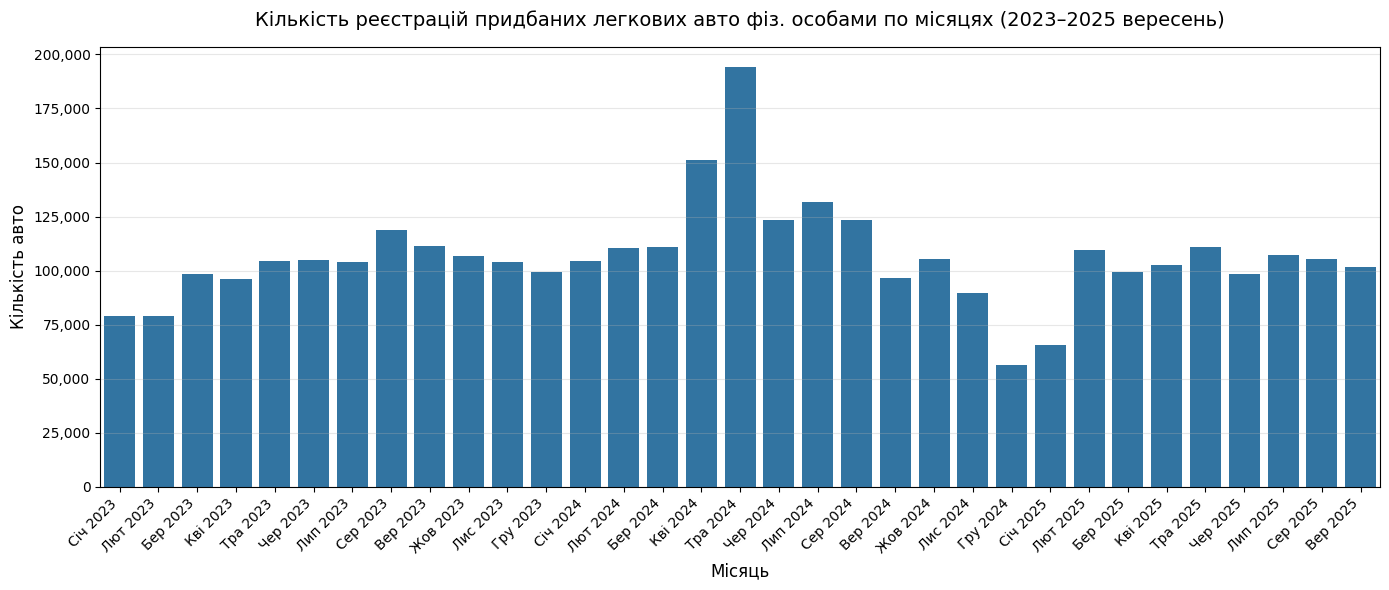

In [28]:
# 1. Лінійний графік середньомісячної динаміки придбання авто
df_work = df_car_final.copy()
df_work = df_work.set_index('D_REG').sort_index()

# Українські назви місяців для форматування
month_names_ua = {
    1: 'Січ', 2: 'Лют', 3: 'Бер', 4: 'Кві', 5: 'Тра', 6: 'Чер',
    7: 'Лип', 8: 'Сер', 9: 'Вер', 10: 'Жов', 11: 'Лис', 12: 'Гру'
}

# Розрахунок кількості операцій по місяцях
monthly = (
    df_work.resample('ME', label='right', closed='right')
      .size()
      .reset_index(name='operations')
)

# Форматування назви місяців
monthly['month_year'] = (
    monthly['D_REG'].dt.month.map(month_names_ua)
    + ' ' + monthly['D_REG'].dt.year.astype(str)
)

# Побудова стовпчастого графіка
colors = sns.color_palette('colorblind6')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly,
    x='month_year',
    y='operations'
)

plt.title('Кількість реєстрацій придбаних легкових авто фіз. особами по місяцях (2023–2025 вересень)', fontsize=14, pad=15)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість авто', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


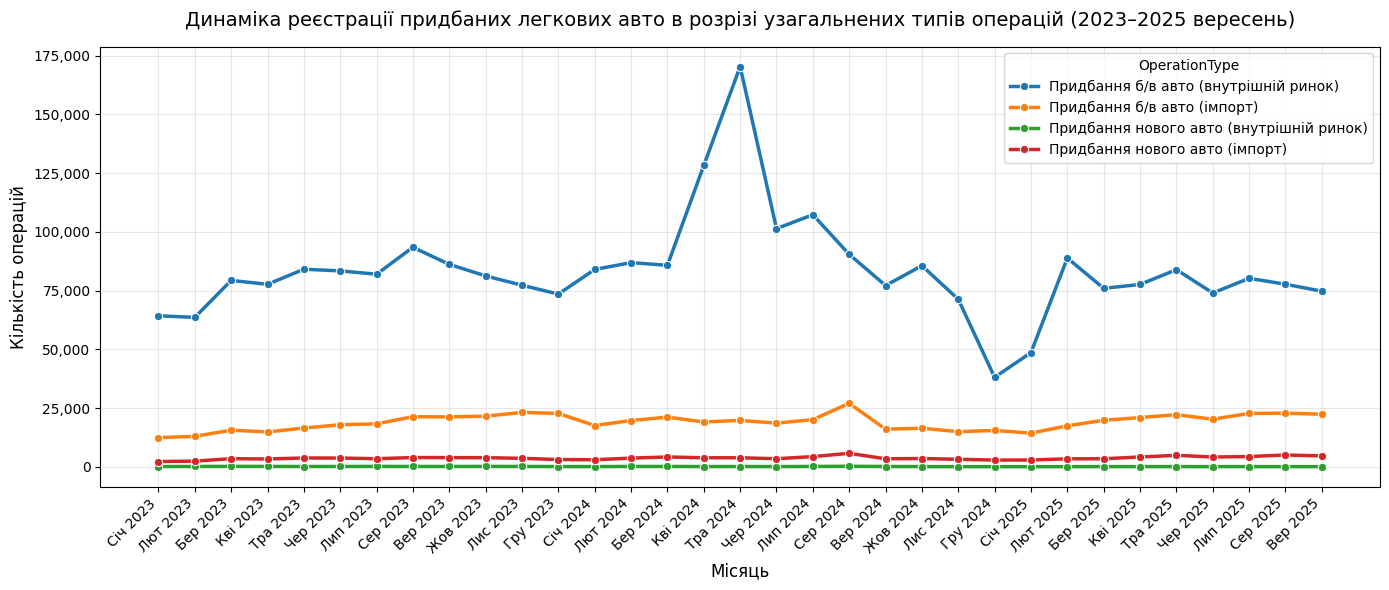

In [29]:
# Графік динаміки придбання авто в розрізі узагальнених типів операцій
# Отримуємо унікальні типи операцій
operation_types = df_work['OperationType'].unique()

monthly_by_op = (
    df_work.groupby('OperationType', observed=True)
      .resample('ME', include_groups=False)
      .size()
      .reset_index(name='operations')
)

# Форматуємо місяць і рік для підписів
monthly_by_op['month_year'] = monthly_by_op['D_REG'].dt.month.map(month_names_ua) + ' ' + monthly_by_op['D_REG'].dt.year.astype(str)

# Графік
colors = sns.color_palette('colorblind6')
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_by_op,
    x='month_year',
    y='operations',
    hue='OperationType',
    marker='o',
    linewidth=2.5
)

plt.title('Динаміка реєстрації придбаних легкових авто в розрізі узагальнених типів операцій (2023–2025 вересень)', fontsize=14, pad=15)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість операцій', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


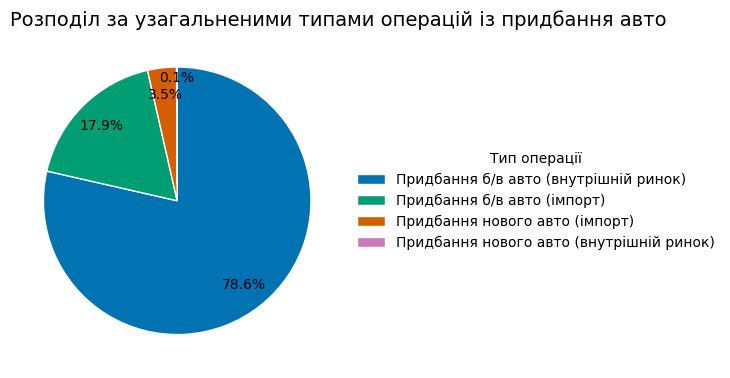

In [30]:
# Графік розподілу загальної кількості покупок за типами операцій
op_counts = df_car_final['OperationType'].value_counts().reset_index()
op_counts.columns = ['OperationType', 'count']
op_counts = op_counts.sort_values('count', ascending=False)

# Побудова кругової діаграми
explode = [0.12 if val == op_counts['count'].min() else 0 for val in op_counts['count']]

colors = sns.color_palette('colorblind6')

# Побудова кругової діаграми
fig, ax = plt.subplots(figsize=(7, 6))
wedges, texts, autotexts = ax.pie(
    op_counts['count'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=colors,
    pctdistance=0.8,
    labeldistance=1.1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    explode = explode
)

# Додаємо легенду збоку
ax.legend(
    wedges,
    op_counts['OperationType'],
    title="Тип операції",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize=10
)

plt.title('Розподіл за узагальненими типами операцій із придбання авто', fontsize=14, loc='left')
plt.tight_layout()
plt.show()


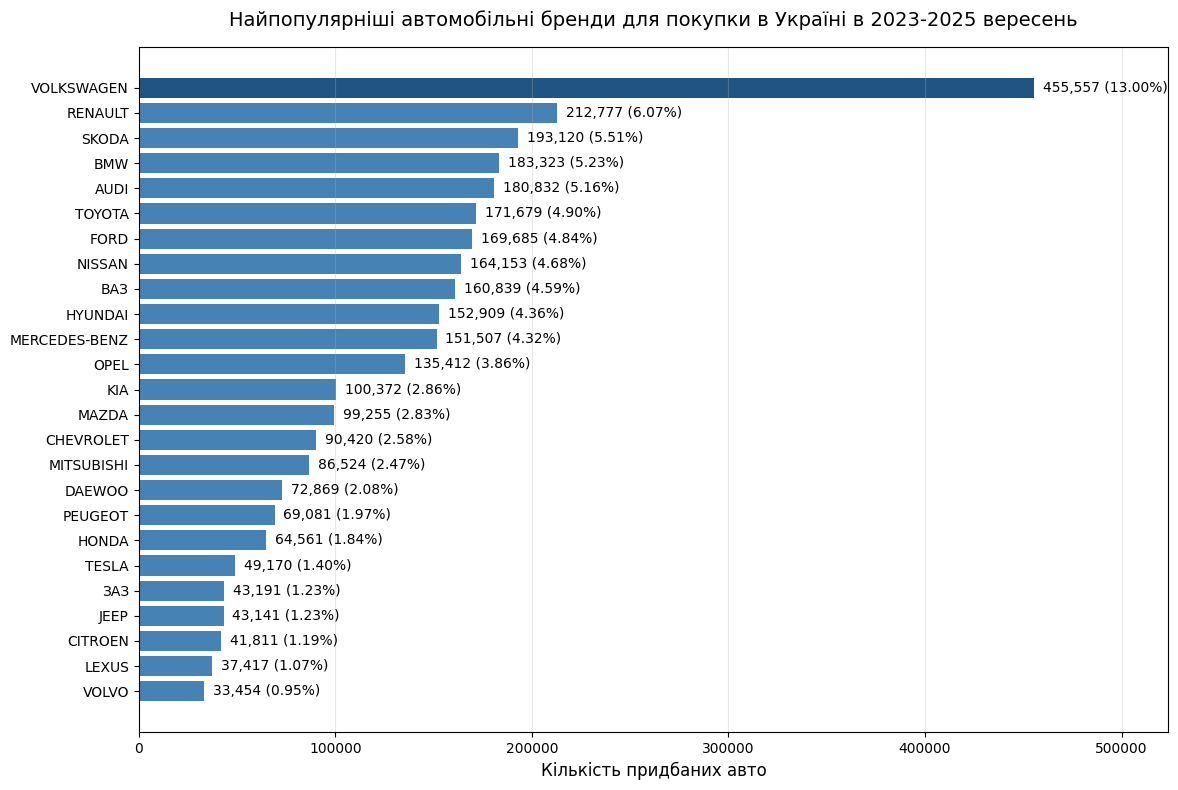

In [31]:
# Графік розподілу загальної кількості покупок за брендами авто

# Топ бренди
brand_counts = (
    df_car_final['BRAND']
    #.astype('string')
    .value_counts()
    .head(25)   # Кількість в ТОП
    .sort_values(ascending=True)
)
total = df_car_final.shape[0] # Загальні кількість записів для обчислення частки

# Побудова графіка
colors = ['steelblue'] * (len(brand_counts) - 1) + ["#225483"]

plt.figure(figsize=(12, 8))
bars = plt.barh(brand_counts.index, brand_counts.values, color=colors)

# Підписи значень
for bar, count in zip(bars, brand_counts.values):
    width = bar.get_width()
    pct = count / total * 100
    plt.text(width + max(brand_counts.values) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(count):,} ({pct:.2f}%)',
             va='center', fontsize=10)

# Оформлення
plt.title('Найпопулярніші автомобільні бренди для покупки в Україні в 2023-2025 вересень', fontsize=14, pad=15)
plt.xlabel('Кількість придбаних авто', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, max(brand_counts.values) * 1.15)

plt.tight_layout()
plt.show()


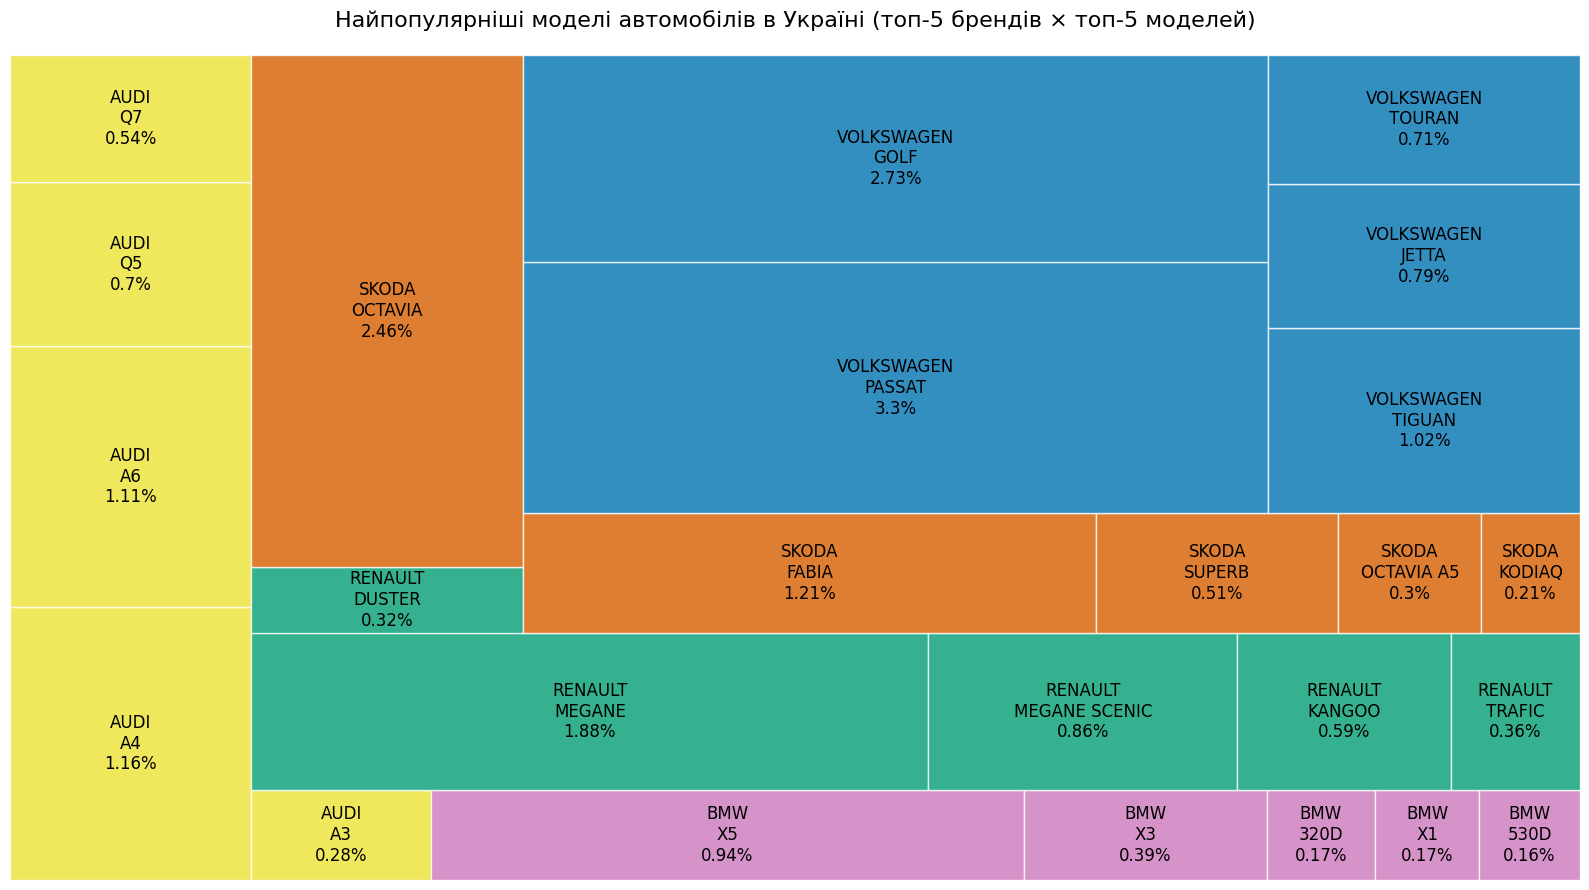

In [32]:
# Проаналізуємо, які моделі найбільш популярні для ТОП-5 брендів

import squarify 

# Групування даних за брендом і моделлю
model_counts = (
    df_car_final.groupby(['BRAND', 'MODEL'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Фільтрація ТОП брендів
top_brands = (
    model_counts.groupby('BRAND', observed=True)['Count']
    .sum()
    .nlargest(5) # Кількість ТОП
    .index
)

model_counts = model_counts[model_counts['BRAND'].isin(top_brands)]

# Фільтрація ТОП моделей для кожного бренду
model_counts = (
    model_counts
    .sort_values(['BRAND', 'Count'], ascending=[True, False])
    .groupby('BRAND', observed=True)
    .head(5)  # Кількість моделей
)

# Розрахунок частки
#total = model_counts['Count'].sum()
model_counts['Percent'] = model_counts['Count'] / total * 100

# Додавання підписів
model_counts['Label'] = (
    model_counts['BRAND'].astype(str) + '\n' +
    model_counts['MODEL'].astype(str) + '\n' +
    model_counts['Percent'].round(2).astype(str) + '%')

# Забарвлення
brand_colors = dict(zip(top_brands, sns.color_palette('colorblind6')))
colors = [brand_colors[b] for b in model_counts['BRAND']]

# Побудова Treemap
plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=model_counts['Count'],
    label=model_counts['Label'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 12},
    edgecolor='white',
    linewidth=1
)

plt.title('Найпопулярніші моделі автомобілів в Україні (топ-5 брендів × топ-5 моделей)', fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

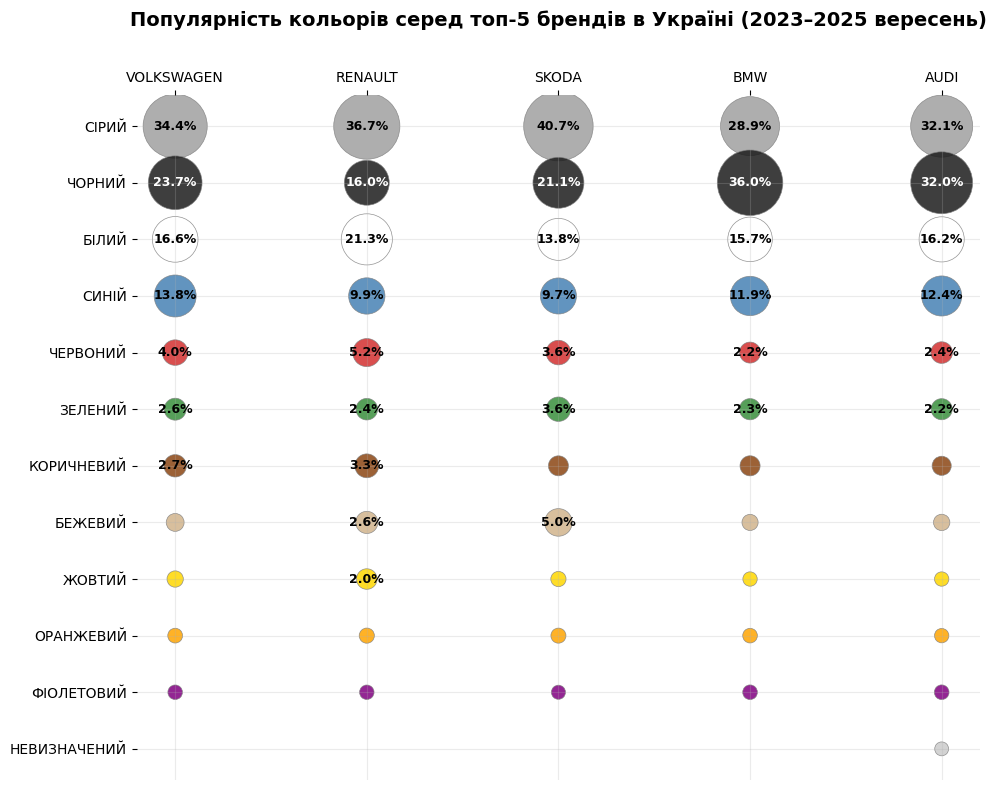

In [33]:
# Аналіз популярності кольорів за брендами авто
df_color = df_car_final.copy()

# Групування
color_counts = (
    df_color.groupby(['BRAND', 'COLOR'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Топ-5 брендів
top_brands = (
    df_color['BRAND'].value_counts()
    .nlargest(5)
    .index.tolist()
)

# Фільтрація топ-5 брендів
color_counts = color_counts[color_counts['BRAND'].isin(top_brands)]

# Частка кольору в межах кожного бренду
color_counts['Percent'] = color_counts.groupby('BRAND', observed=True)['Count'].transform(lambda x: x / x.sum() * 100)

# Загальна частка кольору
color_totals = (
    color_counts.groupby('COLOR', observed=True)['Count']
    .sum()
    .reset_index()
    .sort_values('Count', ascending=False)
)
color_order = color_totals['COLOR'].tolist()

# Перевизначення категорій
color_counts['COLOR'] = pd.Categorical(color_counts['COLOR'], categories=color_order, ordered=True)
color_counts['BRAND'] = pd.Categorical(color_counts['BRAND'], categories=top_brands, ordered=True)

# Мапа кольорів
color_map = {
    'СІРИЙ': '#A0A0A0',
    'ЧОРНИЙ': '#1C1C1C',
    'БІЛИЙ': '#FFFFFF',
    'СИНІЙ': '#4682B4',
    'ЧЕРВОНИЙ': '#D32F2F',
    'ЗЕЛЕНИЙ': '#388E3C',
    'БЕЖЕВИЙ': '#D2B48C',
    'КОРИЧНЕВИЙ': '#8B4513',
    'ЖОВТИЙ': '#FFD700',
    'ОРАНЖЕВИЙ': '#FFA500',
    'ФІОЛЕТОВИЙ': '#800080',
    'НЕВИЗНАЧЕНИЙ': '#CCCCCC'
}

# Побудова Bubble Chart
plt.figure(figsize=(10, 8))
bubble = sns.scatterplot(
    data=color_counts,
    x='BRAND',
    y='COLOR',
    size='Percent',
    hue='COLOR',
    palette=color_map,
    sizes=(100, 2500),
    alpha=0.85,
    edgecolor='gray',
    linewidth=0.5,
    legend=False
)

# Підписи
for _, row in color_counts.iterrows():
    if row['Percent'] > 2:
        plt.text(
            row['BRAND'],
            row['COLOR'],
            f"{row['Percent']:.1f}%",
            ha='center',
            va='center',
            color='black' if row['COLOR'] not in ['ЧОРНИЙ'] else 'white',
            fontsize=9,
            fontweight='bold'
        )

# Оформлення
plt.title(
    'Популярність кольорів серед топ-5 брендів в Україні (2023–2025 вересень)',
    fontsize=14, fontweight='bold', pad=50
)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, ha='center')

ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [34]:
# Топ 5 найпопулярніших авто для придбання в Україні в 2023-2025 рр
top5_cars = (
    df_car_final
    .groupby(['BRAND', 'MODEL', 'COLOR'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Розрахунок відсотку
total = top5_cars['Count'].sum()
top5_cars['Percent'] = (top5_cars['Count'] / total * 100).round(2)

top5_cars = top5_cars.sort_values('Count', ascending=False).head(5)

print('Топ 5 найпопулярніших авто для придбання в Україні в 2023–2025 рр:')
print(top5_cars.to_string(index=False))

Топ 5 найпопулярніших авто для придбання в Україні в 2023–2025 рр:
     BRAND   MODEL  COLOR  Count  Percent
VOLKSWAGEN  PASSAT  СІРИЙ  41780     1.19
     SKODA OCTAVIA  СІРИЙ  37404     1.07
VOLKSWAGEN    GOLF  СІРИЙ  36817     1.05
VOLKSWAGEN  PASSAT ЧОРНИЙ  31762     0.91
   RENAULT  MEGANE  СІРИЙ  28287     0.81


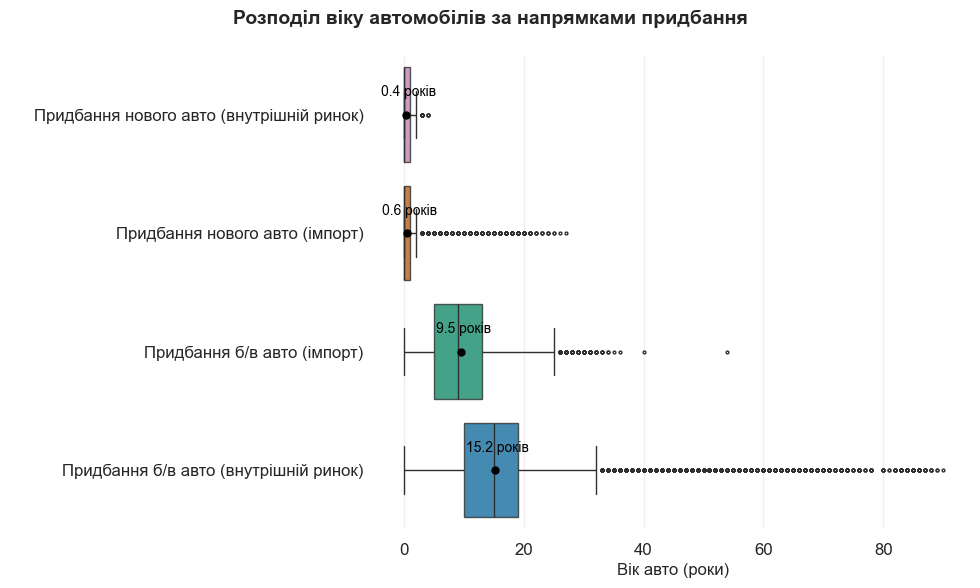

In [35]:
# Графік розподілу віку автомобілів

df_plot = df_car_final[['OperationType', 'AUTO_AGE_AT_REG']].dropna().copy()
df_plot['OperationType'] = df_plot['OperationType'].astype(str)

# Розрахунок середнього віку для сортування
avg_by_type = (
    df_plot.groupby('OperationType')['AUTO_AGE_AT_REG']
    .mean()
    .sort_values()
)
order = avg_by_type.index

# Boxplot
sns.set_theme(style='whitegrid', font_scale=1.1)

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=df_plot,
    x='AUTO_AGE_AT_REG',
    y='OperationType',
    hue='OperationType',
    order=order,
    palette='colorblind6',
    showmeans=True,
    meanprops={
        'marker': 'o',
        'markerfacecolor': 'black',
        'markeredgecolor': 'black',
        'markersize': 5
    },
    boxprops={'alpha': 0.8},
    fliersize=2,
    ax=ax
)

# Підписи
for i, (op_type, avg) in enumerate(avg_by_type.items()):
    plt.text(
        x=avg + 0.5,
        y=i - 0.25, 
        s=f"{avg:.1f} років",
        ha='center',
        va='top',
        fontsize=10,
        color='black'
    )

# Оформлення
plt.xlabel('Вік авто (роки)', fontsize=12)
plt.ylabel(' ')
plt.grid(axis='x', alpha=0.3)

fig.suptitle(
    'Розподіл віку автомобілів за напрямками придбання',
    fontsize=14,
    y=0.98,
    x=0.5,
    ha='center',
    fontweight='bold'
)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

На внутрішньому ринку нові авто майже завжди реєструються одразу після виробництва. Є поодинокі випадки придбання нових авто віком до 5 років.

Імпорт нових авто також переважно сучасний, але з часовим лагом. В окремих випадках вік авто може сягати 30 років. Можливо мова йде про унікальні або колекційні моделі.

Середній вік б/в авто, які імпортуються з-за кордону 9,5 років і медіана близька до цього значення. Більшість авто мають вік від 5 до 14 років. В окремих поодиноких випадках вік імпортованих авто може сягати 25-55 років.

Середній вік б/в авто, які перепродаються на внутрішньому ринку, 15 років. При цьому вік деяких авто може сягати понад 90 років. Хоча основні значення зосереджені в діапазоні до 32 років.

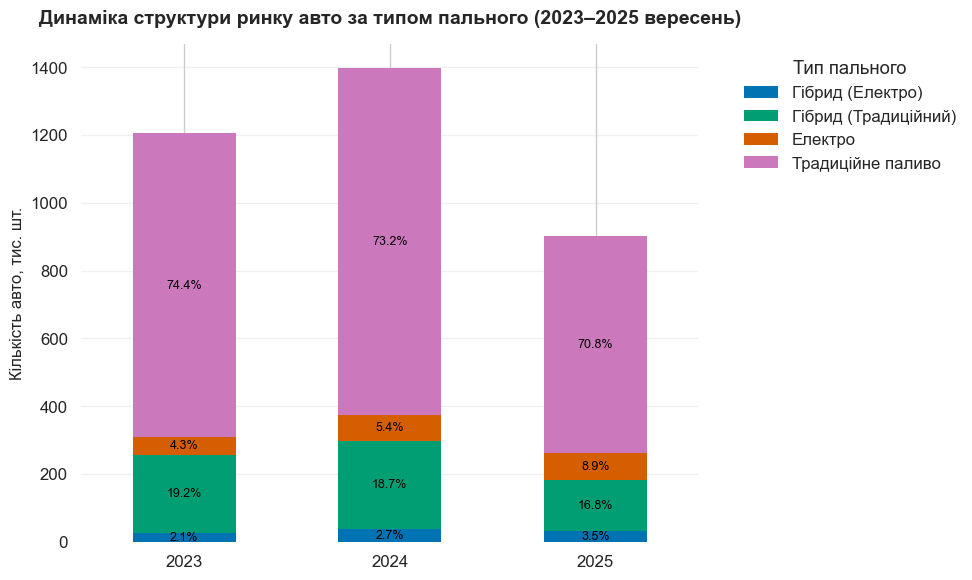

In [36]:
# Аналіз авто за типом пального

df_fuel = df_car_final.copy()

# Узагальнення типів пального
def classify_fuel(fuel):
    fuel = str(fuel).lower()
    if 'електро' in fuel:
        if 'гібрид' in fuel:
            return 'Гібрид (Електро)'
        else:
            return 'Електро'
    elif 'гібрид' in fuel:
        return 'Гібрид (Традиційний)'
    else:
        return 'Традиційне паливо'

df_fuel['FuelGroup'] = df_fuel['FuelType'].apply(classify_fuel)
df_fuel['Year'] = df_fuel['D_REG'].dt.year # Рік реєстрації

# Групування
fuel_trend = (
    df_fuel.groupby(['Year', 'FuelGroup'], observed=True)
    .size()
    .reset_index(name='Count')
)

fuel_trend['Percent'] = fuel_trend.groupby('Year')['Count'].transform(lambda x: x / x.sum() * 100)

# stacked bar chart
fuel_pivot = fuel_trend.pivot(index='Year', columns='FuelGroup', values='Count').fillna(0)

ax = fuel_pivot.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette('colorblind6', n_colors=len(fuel_pivot.columns)),
    figsize=(10, 6),
    edgecolor='none'
)

# Підписи
for i, year in enumerate(fuel_pivot.index):
    total = fuel_pivot.loc[year].sum()
    cumulative = 0
    for j, col in enumerate(fuel_pivot.columns):
        count = fuel_pivot.loc[year, col]
        if count > 0:
            percent = count / total * 100
            ax.text(
                i,  # позиція по X
                cumulative + count / 2,  # позиція по Y — середина сегмента
                f'{percent:.1f}%',  # текст підпису
                ha='center', va='center', fontsize=9, color='black'
            )
            cumulative += count

# Форматування
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))

ax.set_title(
    'Динаміка структури ринку авто за типом пального (2023–2025 вересень)',
    fontsize=14, fontweight='bold', pad=15
)
ax.set_xlabel('')
ax.set_ylabel('Кількість авто, тис. шт.', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0, ha='center')

legend = ax.legend(title='Тип пального', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_linewidth(0)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


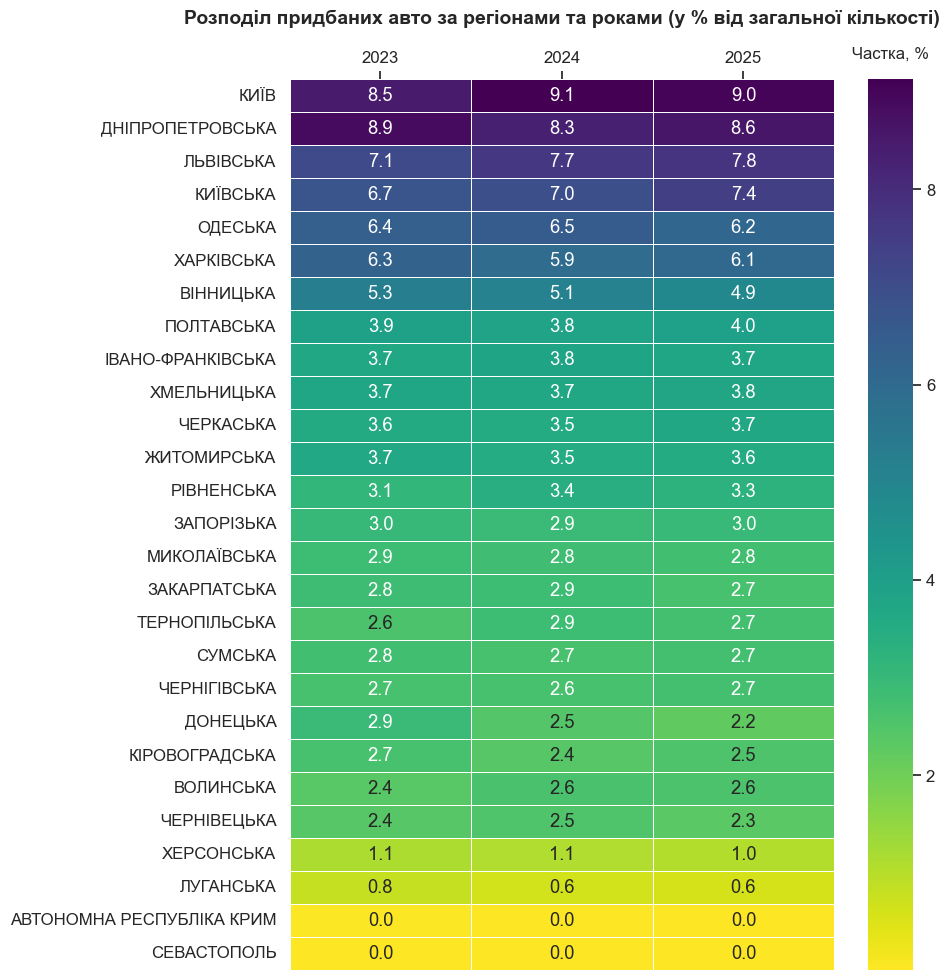

In [37]:
# Аналіз активності придбання авто в регіональному розрізі

# Групування за роками і регіонами
region_heat = (
    df_car_final.groupby([df_car_final['D_REG'].dt.year, 'Region'], observed=True)
    .size()
    .reset_index(name='Count')
)

region_heat['Region'] = (
    region_heat['Region']
    .str.replace('ОБЛАСТЬ', '', regex=False)
    .str.replace('М.', '', regex=False)
    .str.strip()
)

# Обчислення частки (%)
region_heat['Percent'] = region_heat.groupby('D_REG')['Count'].transform(lambda x: x / x.sum() * 100)

# Сортування
region_order = (
    region_heat.groupby('Region')['Count']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Поворот таблиці для heatmap
region_pivot = region_heat.pivot(index='Region', columns='D_REG', values='Percent').loc[region_order]

# Побудова heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    region_pivot,
    cmap=sns.color_palette('viridis_r', as_cmap=True),
    linewidths=0.4,
    annot=True,
    fmt='.1f',
    cbar_kws={'orientation': 'vertical'}
)

# Оформлення
plt.title(
    'Розподіл придбаних авто за регіонами та роками (у % від загальної кількості)',
    fontsize=14, fontweight='bold', pad=40
)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.xticks(rotation=0, ha='center')

cbar = ax.collections[0].colorbar
cbar.ax.set_xlabel('Частка, %', fontsize=12, labelpad=15)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.tick_top()

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
